In [29]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [30]:
np.random.seed(0)

In [31]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

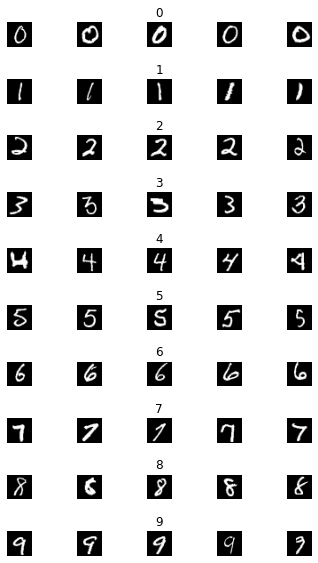

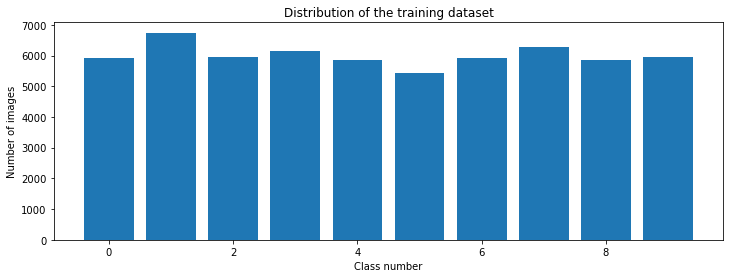

In [32]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

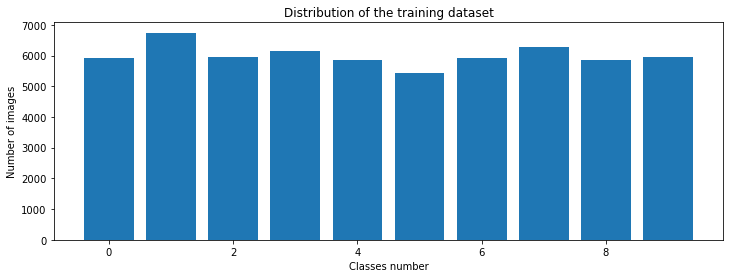

In [19]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_of_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Classes number")
plt.ylabel("Number of images")

In [33]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train/255 
X_test = X_test/255

In [34]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [24]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [35]:
model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 200, verbose = 1, shuffle = 1)

Epoch 1/10
270/270 [==============================] - 1s 3ms/step - loss: 0.6215 - accuracy: 0.7991 - val_loss: 0.3138 - val_accuracy: 0.9068
Epoch 2/10
270/270 [==============================] - 1s 2ms/step - loss: 0.3488 - accuracy: 0.8960 - val_loss: 0.2804 - val_accuracy: 0.9168
Epoch 3/10
270/270 [==============================] - 1s 2ms/step - loss: 0.3070 - accuracy: 0.9104 - val_loss: 0.2617 - val_accuracy: 0.9227
Epoch 4/10
270/270 [==============================] - 0s 2ms/step - loss: 0.2884 - accuracy: 0.9143 - val_loss: 0.2379 - val_accuracy: 0.9300
Epoch 5/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2825 - accuracy: 0.9176 - val_loss: 0.2510 - val_accuracy: 0.9220
Epoch 6/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2745 - accuracy: 0.9201 - val_loss: 0.2393 - val_accuracy: 0.9310
Epoch 7/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2646 - accuracy: 0.9223 - val_loss: 0.2270 - val_accuracy: 0.9330
Epoch 

Text(0.5, 0, 'epoch')

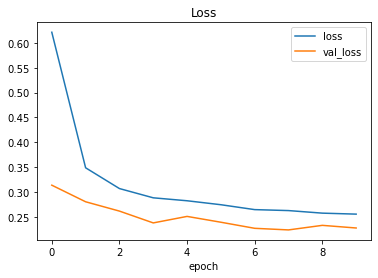

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

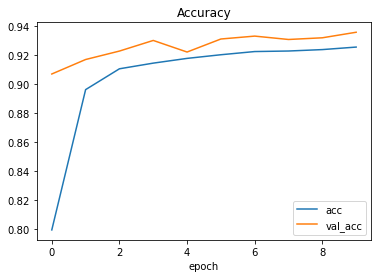

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [41]:
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.2651129364967346
Test accuracy: 0.921999990940094


In [42]:
import requests
from PIL import Image

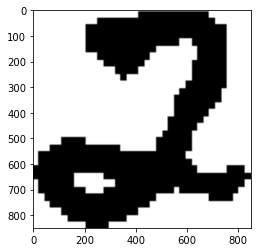

In [43]:
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
predicted digit: [3]


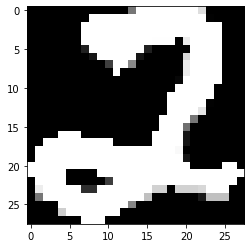

In [44]:
import cv2

img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))

img = img/255
img = img.reshape(1, 784)

prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))